# Investment Analysis Assignment

## Objectives: To understand the global trends in investment to which SPark Funds can look into and make their investment decisions efficiently

### Business and Data Understanding

There are two constraints that Spark Funds would adhere to while investing:
1. The investment bracket per round of investment would be 5 to 15 million.
2. The official languauge of the country should be English only then will the investment happen for the ease of communication


In [937]:
#importing reqiuired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the companies data into df
pd.set_option('display.float_format', lambda x: '%.2f' % x)
companies =pd.read_csv('C:/Users/hp/Downloads/companies.csv')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [938]:
#Compaines df data analysis
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Jasper-Wireless,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [939]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [940]:
companies.shape

(66368, 10)

In [941]:
#Making the data fit for analysis
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name'].head()

0                     #fame
1                  :Qounter
2    (THE) ONE of THEM,Inc.
3                   0-6.com
4          004 Technologies
Name: name, dtype: object

In [942]:
companies['permalink']=companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')
companies['permalink'].head()

0                    /Organization/-Fame
1                 /Organization/-Qounter
2    /Organization/-The-One-Of-Them-Inc-
3                  /Organization/0-6-Com
4         /Organization/004-Technologies
Name: permalink, dtype: object

In [943]:
#Conversion into all lowercase as this would eavoid duplication and inconsistensices while merging
companies['name']=companies['name'].str.lower()
companies['name'].head()

0                     #fame
1                  :qounter
2    (the) one of them,inc.
3                   0-6.com
4          004 technologies
Name: name, dtype: object

In [944]:
companies['permalink']= companies['permalink'].str.lower()
companies['permalink'].head()

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
4         /organization/004-technologies
Name: permalink, dtype: object

In [945]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [946]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [947]:
#Finding unique companies in the companies df
len(companies['permalink'].unique())

66368

In [948]:
companies['permalink'].describe()

count                                    66368
unique                                   66368
top       /organization/eap-technology-systems
freq                                         1
Name: permalink, dtype: object

In [949]:
#loading rounds df
rounds2 = pd.read_csv('C:/Users/hp/Downloads/rounds2.csv')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [950]:
#Analysing rounds df
rounds2.shape

(114949, 6)

In [951]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [952]:
#checking for null values in df for further analaysis
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [612]:
rounds2.describe()

,raised_amount_usd
count,94959.00
mean,10426869.33
std,114821247.98
min,0.00
25%,322500.00
50%,1680511.00
75%,7000000.00
max,21271935000.00


In [953]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [955]:
#Making the data fit for anlaysis using proper encoding and removing special characters
rounds2['company_permalink']=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')
rounds2['company_permalink'].head()

0                    /organization/-fame
1                 /ORGANIZATION/-QOUNTER
2                 /organization/-qounter
3    /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                  /organization/0-6-com
Name: company_permalink, dtype: object

In [956]:
#Converting the string columns in all lowercase which can cause duplication during further analysis
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
rounds2['company_permalink'].head()

0                    /organization/-fame
1                 /organization/-qounter
2                 /organization/-qounter
3    /organization/-the-one-of-them-inc-
4                  /organization/0-6-com
Name: company_permalink, dtype: object

In [957]:
rounds2['funding_round_permalink']=rounds2.funding_round_permalink.str.encode('utf-8').str.decode('ascii','ignore')
rounds2['funding_round_permalink'].head()

0    /funding-round/9a01d05418af9f794eebff7ace91f638
1    /funding-round/22dacff496eb7acb2b901dec1dfe5633
2    /funding-round/b44fbb94153f6cdef13083530bb48030
3    /funding-round/650b8f704416801069bb178a1418776b
4    /funding-round/5727accaeaa57461bd22a9bdd945382d
Name: funding_round_permalink, dtype: object

In [958]:
rounds2['funding_round_permalink']=rounds2['funding_round_permalink'].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [959]:
#Finding unique company_ids in rounds2
len(rounds2['company_permalink'].unique())

66368

##### In companies dataframe, permalink is the unique value for every vompany name and company name has one null value as well so permalink can be considered as the primary key here

In [960]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [961]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [962]:
#Checking if are ther any companies in rounds which are not present in companies
companies.loc[~rounds2['company_permalink'].isin(companies['permalink'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [1005]:
#Merging two data frames to get amaster_frame based on the unique key -company_permalink and permalink
#Using inner join here
master_frame=pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')
master_frame.shape

(114949, 16)

Checkpoint 2

Analysing the merged master_frame now:

In [1006]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [1007]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [1008]:
len(master_frame.index)

114949

In [1009]:
#Null Value percentage in this df
master_frame.isnull().sum()/round(len(master_frame.index),2)*100

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

Since funding_round_code is having moe than 70% we can think of dropping that column 

In [1010]:
master_frame=master_frame.drop(['funding_round_code'],axis=1)

In [1011]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
 5   permalink                114949 non-null  object 
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [1012]:
#Analsyisng the null values after dropping the column funding_round_code with more than 70% null values
master_frame.isnull().sum()/round(len(master_frame.index),2)*100

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [1013]:
#Analysing the statistical data now to do some analysis on further column values
master_frame.describe()

,raised_amount_usd
count,94959.00
mean,10426869.33
std,114821247.98
min,0.00
25%,322500.00
50%,1680511.00
75%,7000000.00
max,21271935000.00


Since our focus is on the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity), we will filter our dataframe to have only these 4 funding types

In [1014]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture', 'seed', 'angel', 'private_equity'])]
master_frame.shape

(94397, 15)

Now our task is to find the  Average Values of Investments for Each of these Funding Types

We will first try to analyse the records undese funding types

In [1015]:
master_frame.describe()

,raised_amount_usd
count,80627.00
mean,9347994.74
std,75629397.45
min,0.00
25%,400000.00
50%,2000000.00
75%,7975495.50
max,17600000000.00


In [1016]:
master_frame.isnull().sum()/round(len(master_frame.index),2)*100
#the null values for raiseD_amount has reduced to 14.59% from 17%

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         14.59
permalink                  0.00
name                       0.00
homepage_url               4.39
category_list              2.65
status                     0.00
country_code               7.76
state_code                 9.83
region                     9.07
city                       9.06
founded_at                17.71
dtype: float64

We shall now try to draw the inference based on only these 4 funding types

In [1017]:
#total value count under each funting type
master_frame['funding_round_type'].value_counts() 


venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

In [1018]:
#Average funding amounts categorized by funding_round_type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel              958694.47
private_equity   73308593.03
seed               719818.00
venture          11748949.13
Name: raised_amount_usd, dtype: float64

In [1019]:
#funding_round_types created to use it for the plot analysis
funding_round_types = master_frame['funding_round_type'].value_counts() 
type(funding_round_types)

pandas.core.series.Series

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, we can see that bventure funding type is the only one in our bracket (5000000 to 15000000 USD inclusive)

Therefore, for the further analysis we will consider the Venture funding type in which Sparks Fund will be intrested for investing in

In [1020]:
#Since, Venture funding type is the one that matters to us now, we will drop all the rows and continue our analysis 
#on the Venture type funding records only
master_frame = master_frame[master_frame['funding_round_type']=='venture']
master_frame.shape
#this shape is correct because we just calculated the value_Count for the venture funding type as well and they both are same

(55494, 15)

### Checkpoints - Part 2
#### Checkpoint 3: Country Analysis

Starting with the country analysis we shall first start with the venture type funding records in the data set and their countries of investment

In [1021]:
master_frame['country_code'].isnull().sum()

2875

In [1022]:
master_frame['country_code'].describe()

count     52619
unique      103
top         USA
freq      38372
Name: country_code, dtype: object

In [1023]:
master_frame['country_code'].value_counts()

USA    38372
GBR     2303
CHN     2087
CAN     1346
IND      992
       ...  
BHR        1
CRI        1
MOZ        1
TUN        1
MNE        1
Name: country_code, Length: 103, dtype: int64

In [1024]:
#Also, lets check for the percentage of This unknown values in our data set
round(master_frame['country_code'].isnull().sum()/len(master_frame['country_code'].index),2)*100
#So, there is only 5% of the unknown country values

5.0

NOw, going forward we need to classify this data set based on the countries only and SPark Fund will only be investing in the official English speaking country

In [1025]:
top9= pd.DataFrame(master_frame.groupby('country_code').sum().sort_values(['raised_amount_usd'],ascending=False))
 top9.head(9)

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


In [1088]:
#to be used fo rplot analysis..saving the top9.head(9) in other dataframe
top9countries = top9.head(9)
top9countries.head()

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00


NOw from these top 9 countries we can find fromt he Wikipedia link that the top 3(USA,GBR and IND are the offical english language countries)


#### Checkpoint 4: Sector Analysis 1

NOw, when we talk about sector analysis, we will start with mapping the category list to our 8 main secotrs of interest.
TO start with we shall first extract the primary_sector 

In [1026]:
#Analyzing the category list column
master_frame['category_list'].describe()

count             54362
unique            11634
top       Biotechnology
freq               5673
Name: category_list, dtype: object

In [1027]:
#Null value percentage of category_list column
round(master_frame['category_list'].isnull().sum()/len(master_frame['category_list'].index),2)*100

2.0

In [1028]:
#to avoid duplicacy converting the category_list values into lowercase
master_frame['category_list']= master_frame['category_list'].str.lower()
master_frame['category_list'].head()

0                                                media
1    application platforms|real time|social network...
3                                    apps|games|mobile
4                                          curated web
5                                             software
Name: category_list, dtype: object

In [1029]:
#Extracting the primary sector from category_list by splitting by '|'
master_frame['category_list'] = master_frame['category_list'].str.split('|',expand=True)
master_frame['category_list'].head()

0                    media
1    application platforms
3                     apps
4              curated web
5                 software
Name: category_list, dtype: object

In [1030]:
#loading the mapping file into dataframe
mapping = pd.read_csv('C:/Users/hp/Downloads/mapping.csv',encoding='utf-8')
mapping.shape

(688, 10)

In [1031]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [1032]:
mapping['category_list']=mapping['category_list'].str.lower()
mapping['category_list'].head()

0              NaN
1               3d
2      3d printing
3    3d technology
4       accounting
Name: category_list, dtype: object

In [1033]:
#mapping category_list value has Aolytics in place of analytics-so replacing 0 by na
mapping['category_list']= mapping['category_list'].str.replace('0','na')
mapping['category_list'].head()

0              NaN
1               3d
2      3d printing
3    3d technology
4       accounting
Name: category_list, dtype: object

In [1034]:
#melting the mapping df to make it long from wide(it is like unpivoting in sql)
mapping = pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])


In [1035]:
mapping.shape

(6192, 3)

In [1036]:
mapping.info()  #Analyzing the data stored in the mapping df after melting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  6183 non-null   object
 1   variable       6192 non-null   object
 2   value          6192 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 145.2+ KB


In [1037]:
#We should now rename the column'variable' to 'main_sector'
mapping.rename(columns={'variable':'main_sector'},inplace=True)
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  6183 non-null   object
 1   main_sector    6192 non-null   object
 2   value          6192 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 145.2+ KB


In [1038]:
mapping.groupby('main_sector').sum()

,value
main_sector,
Automotive & Sports,22
Blanks,1
Cleantech / Semiconductors,53
Entertainment,89
Health,63
Manufacturing,40
"News, Search and Messaging",72
Others,195
"Social, Finance, Analytics, Advertising",153


In [1039]:
mapping[mapping['value']==0].count()

category_list    5496
main_sector      5504
value            5504
dtype: int64

In [1040]:
#Now, we need only the value =1 records from this df
mapping = mapping[mapping['value']==1]
mapping.shape

(688, 3)

In [1041]:
#Since blanks is the null item we can remove it from our mapping df
mapping =mapping[mapping['main_sector']!='Blanks']
mapping.groupby('main_sector').sum()

,value
main_sector,
Automotive & Sports,22
Cleantech / Semiconductors,53
Entertainment,89
Health,63
Manufacturing,40
"News, Search and Messaging",72
Others,195
"Social, Finance, Analytics, Advertising",153


Now since the value column in the mapping df is having all values as 1 we can drop that column and then proceed with the merging of mapping and master_frame df

In [1042]:
mapping = mapping.drop(['value'],axis=1)


In [1043]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 6167
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [1044]:
mapping.shape

(687, 2)

Merging MApping and MAster_frame data frame

In [1045]:
master_mapping_merge = pd.merge(master_frame,mapping,how='inner',on='category_list')
master_mapping_merge.shape

(54341, 16)

In [1046]:
master_mapping_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54341 entries, 0 to 54340
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        54341 non-null  object 
 1   funding_round_permalink  54341 non-null  object 
 2   funding_round_type       54341 non-null  object 
 3   funded_at                54341 non-null  object 
 4   raised_amount_usd        49705 non-null  float64
 5   permalink                54341 non-null  object 
 6   name                     54341 non-null  object 
 7   homepage_url             51727 non-null  object 
 8   category_list            54341 non-null  object 
 9   status                   54341 non-null  object 
 10  country_code             52004 non-null  object 
 11  state_code               51106 non-null  object 
 12  region                   51334 non-null  object 
 13  city                     51334 non-null  object 
 14  founded_at            

In [1047]:
#Analysing the new merged df
master_mapping_merge.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd           4636
permalink                      0
name                           0
homepage_url                2614
category_list                  0
status                         0
country_code                2337
state_code                  3235
region                      3007
city                        3007
founded_at                 10376
main_sector                    0
dtype: int64

In [1048]:
 master_mapping_merge['main_sector'].value_counts()

Others                                     12959
Social, Finance, Analytics, Advertising    11178
Cleantech / Semiconductors                 10824
News, Search and Messaging                  6962
Health                                      4393
Manufacturing                               3791
Entertainment                               3334
Automotive & Sports                          900
Name: main_sector, dtype: int64

In [1049]:
#Renaming the category_list column to primary_Sector
master_mapping_merge.rename(columns={'category_list':'primary_sector'},inplace=True)
master_mapping_merge.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'permalink', 'name', 'homepage_url',
       'primary_sector', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'main_sector'],
      dtype='object')

### Checkpoint 5: Sector Analysis 2

We can filter the masteR_mapping_merge_data frame now to have only the top 3 english speaking countries

In [1050]:
master_mapping_merge= master_mapping_merge[master_mapping_merge['country_code'].isin(['USA','GBR','IND'])]
master_mapping_merge['country_code'].value_counts()

USA    38020
GBR     2264
IND      984
Name: country_code, dtype: int64

#### Till now we have the following data as per our analysis:
#### The most suitable funding type in our given bracket  is venture
#### Top 3 english speaking countires are USA,GBR and IND
#### All the companies are now mapped with their main_sector in the merged df

Now, we shall restrict our master_data frame for only raised amount between 5 million and 15 million USD (inclusive)

In [1051]:
master_mapping_merge=master_mapping_merge[(master_mapping_merge['raised_amount_usd']>=5000000) & (master_mapping_merge['raised_amount_usd']<=15000000)]
master_mapping_merge.shape

(13012, 16)

In [1052]:
master_mapping_merge['country_code'].value_counts()

USA    12063
GBR      621
IND      328
Name: country_code, dtype: int64

In [1053]:
master_mapping_merge.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Entertainment


In [829]:
master_mapping_merge.to_csv('C:/Users/hp/Downloads/master_mapping_filtered_amt.csv',encoding='utf-8')

##### Now we need to find the heavily invested main_sector out of our 8 mian sectors for all the three countries

In [1059]:
D1 = master_mapping_merge[master_mapping_merge['country_code']=='USA']
D1['count']=D1.groupby('main_sector')['main_sector'].transform('count')
D1['sum']=D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
D1.head()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,count,sum
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment,591,5099197982.00
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Entertainment,591,5099197982.00
25,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment,591,5099197982.00
26,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment,591,5099197982.00
36,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.00,/organization/matchmine,matchmine,http://matchmine.com,media,closed,USA,MA,Boston,Needham,01-01-2007,Entertainment,591,5099197982.00


In [1060]:
D1.shape

(12063, 18)

In [1061]:
#Answering all the questions for 5.1 for USA
#Total number of investments (count)
D1['raised_amount_usd'].count()

12063

In [1062]:
# Total amount of investment (USD) for 5.1 fotr USA
round(D1['raised_amount_usd'].sum()/1000000,2)

107757.1

In [1063]:
#Analyzing the hightest investement type sector
D1['main_sector'].value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [1064]:
#Finding the company name fro the top invested sector
sum_usa_amount = pd.DataFrame(D1[D1['main_sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum())
sum_usa_amount.sort_values('raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/virtustream,64300000.00


Now, we know that the compnay with highest investment in OTHERS sector is by virtustream

In [1065]:
#Finding the company name fro the top invested sector
sum_usa_amount = pd.DataFrame(D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum())
sum_usa_amount.sort_values('raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/shotspotter,67933006.00


Now, we know that the compnay with highest investment in Social, Finance, Analytics, Advertising(2nd Top Sector) sector is by shotspotter

#### Performing same type of analysis for GBR, by crerating a new df

In [1066]:
D2 = master_mapping_merge[master_mapping_merge['country_code']=='GBR']
D2['count']=D2.groupby('main_sector')['main_sector'].transform('count')
D2['sum']=D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
D2.head()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,count,sum
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment,56,482784687.00
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment,56,482784687.00
102,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,09-07-2014,10000000.00,/organization/common-interest-communities,common interest communities,http://commoninterestcommunities.com/,application platforms,operating,GBR,H9,London,London,NaN,"News, Search and Messaging",73,615746235.00
118,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,01-10-2014,5460000.00,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,application platforms,operating,GBR,C3,London,Cambridge,01-01-2013,"News, Search and Messaging",73,615746235.00
119,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,05-10-2015,5400000.00,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,application platforms,operating,GBR,C3,London,Cambridge,01-01-2013,"News, Search and Messaging",73,615746235.00


In [1067]:
D2.shape

(621, 18)

In [1068]:
#Answering all the questions for 5.1 for GBR
#Total number of investments (count)
D2['raised_amount_usd'].count()

621

In [1069]:
#Answering all the questions for 5.1 for GBR
#Total number of investments (count)
round(D2['raised_amount_usd'].sum()/1000000,2)

5379.08

In [1070]:
#Analyzing the hightest investement type sector
D2['main_sector'].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

From the above results we can conclude that for GBR the top 3 sectors are 
Others
Social, Finance, Analytics, Advertising
Cleantech / Semiconductors

In [1071]:
#Finding the company name fro the top invested sector
sum_usa_amount = pd.DataFrame(D2[D2['main_sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum())
sum_usa_amount.sort_values('raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37000000.00


Now, we know that the compnay with highest investment in OTHERS sector is by electric-cloud

In [1072]:
#Finding the company name fro the top invested sector
sum_usa_amount = pd.DataFrame(D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum())
sum_usa_amount.sort_values('raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37500000.00


Now, we know that the compnay with highest investment in Social, Finance, Analytics, Advertising(2nd Top Sector) sector is by celltick-technologies

### Performing same type of analysis for IND, by crerating a new df

In [1073]:
D3 = master_mapping_merge[master_mapping_merge['country_code']=='IND']
D3['count']=D3.groupby('main_sector')['main_sector'].transform('count')
D3['sum']=D3.groupby('main_sector')['raised_amount_usd'].transform('sum')
D3.head()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,count,sum
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,33,280830000.00
279,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,02-10-2015,6000000.00,/organization/chillr-2,chillr,http://chillr.in,apps,operating,IND,13,Cochin,Cochin,22-12-2013,"News, Search and Messaging",52,433834545.00
434,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,05-06-2015,5000000.00,/organization/jugnoo,jugnoo,https://jugnoo.in/#/,apps,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,"News, Search and Messaging",52,433834545.00
555,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,14-04-2015,10000000.00,/organization/peppertap,peppertap,http://www.peppertap.com,apps,operating,IND,10,New Delhi,Gurgaon,26-11-2014,"News, Search and Messaging",52,433834545.00
710,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,30-10-2015,7665775.00,/organization/tinyowl-technology,tinyowl technology,http://tinyowl.com/,apps,operating,IND,16,Mumbai,Mumbai,NaN,"News, Search and Messaging",52,433834545.00


In [1074]:
D3.shape

(328, 18)

In [1075]:
#Answering all the questions for 5.1 for IND
#Total number of investments (count)
D3['raised_amount_usd'].count()

328

In [1076]:
#Total amount of investments (count)
round(D3['raised_amount_usd'].sum()/1000000,2)

2949.54

In [1077]:
#Analyzing the hightest investement type sector
D3['main_sector'].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [1078]:
#Finding the company name fro the top invested sector
sum_usa_amount = pd.DataFrame(D3[D3['main_sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum())
sum_usa_amount.sort_values('raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39000000.00


Now, we know that the compnay with highest investment in OTHERS sector is by firstcry-com

In [1079]:
#Finding the company name fro the top invested sector
sum_usa_amount = pd.DataFrame(D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum())
sum_usa_amount.sort_values('raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/manthan-systems,50700000.00


Now, we know that the compnay with highest investment in Social, Finance, Analytics, Advertising(2nd Top Sector) sector is by manthan-systems

#### Checkpoint 6: Plots
A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds- therefore for this purpose we cna consider plotting pie chart as that woulde be best to dsiaply fractions

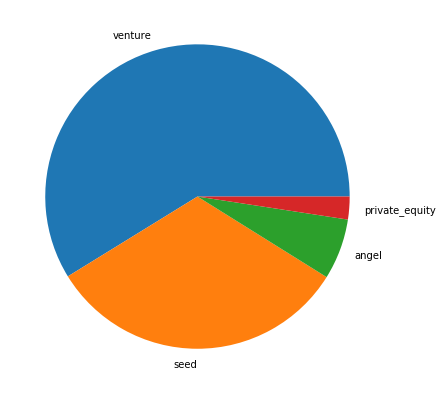

In [1082]:
plot1 = plt.figure(figsize =(10, 7)) 
plt.pie(funding_round_types.values, labels = funding_round_types.index)
plt.show()

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

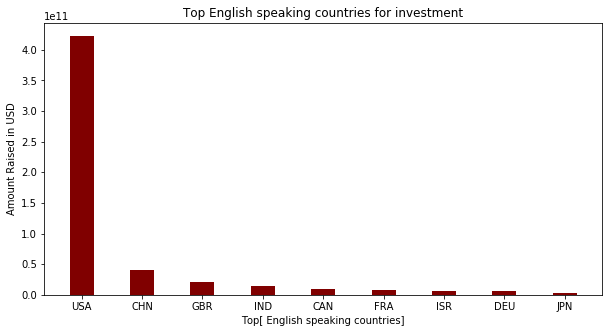

In [1089]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(top9countries.index, top9countries.raised_amount_usd, color ='maroon',width = 0.4)
plt.xlabel("Top[ English speaking countries]") 
plt.ylabel("Amount Raised in USD") 
plt.title("Top English speaking countries for investment") 
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [1095]:
plot3_df = master_mapping_merge[master_mapping_merge['country_code'].isin(['USA','GBR''IND'])]
plot3_df['count']=plot3_df.groupby('main_sector')['raised_amount_usd'].transform('count')
plot3_df.head()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,count
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment,591
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Entertainment,591
25,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment,591
26,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment,591
36,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.00,/organization/matchmine,matchmine,http://matchmine.com,media,closed,USA,MA,Boston,Needham,01-01-2007,Entertainment,591


In [1096]:
plot3_df = plot3_df[plot3_df['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [1098]:
plot3_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,main_sector,count
2307,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.00,/organization/170-systems,170 systems,http://www.170systems.com,software,acquired,USA,MA,Boston,Bedford,01-01-1990,Others,2950
2334,/organization/6th-sense-analytics,/funding-round/cd61853ebd84ed7b88961476c709d839,venture,31-01-2007,5000000.00,/organization/6th-sense-analytics,6th sense analytics,http://www.sixthsenseanalytics.com,software,acquired,USA,NC,Raleigh,Morrisville,01-01-2004,Others,2950
2341,/organization/above-all-software,/funding-round/022e0561bb09c8a0b620ac0b8d7009ff,venture,17-02-2004,11500000.00,/organization/above-all-software,above all software,NaN,software,operating,USA,CA,SF Bay Area,Redwood City,01-01-2002,Others,2950
2352,/organization/accreon,/funding-round/49d4a59f1c027e846ff013118f1c47db,venture,08-04-2015,5500000.00,/organization/accreon,accreon,http://www.accreon.com/,software,operating,USA,MA,Boston,Boston,01-01-2008,Others,2950
2362,/organization/achieve3000,/funding-round/f34839a52eb6e56e0a1f9cdd09248861,venture,24-07-2007,9000000.00,/organization/achieve3000,achieve3000,http://www.achieve3000.com,software,operating,USA,NJ,Newark,Lakewood,01-01-2000,Others,2950


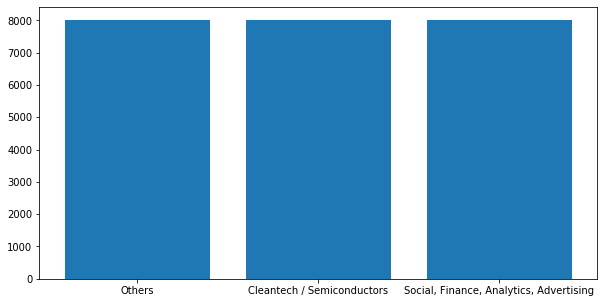

In [1120]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(plot3_df.main_sector,plot3_df.raised_amount_usd.count())
plt.show()